# importing necessary libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.datasets import load_iris
import random as rd
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min
from sklearn.decomposition import PCA

# loading and scaling the data

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# EDA

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.isnull().values.any()

False

In [11]:
targets = df['target'].value_counts()
targets

0    50
1    50
2    50
Name: target, dtype: int64

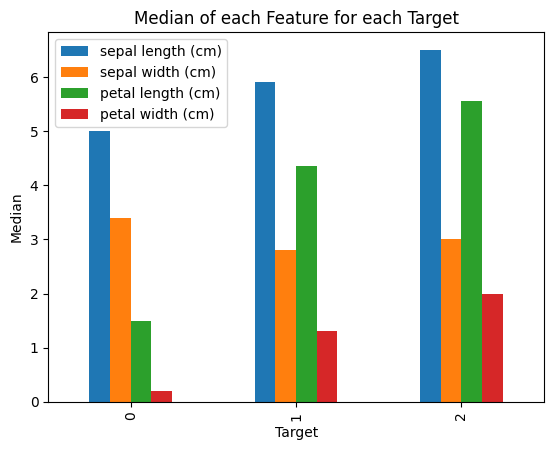

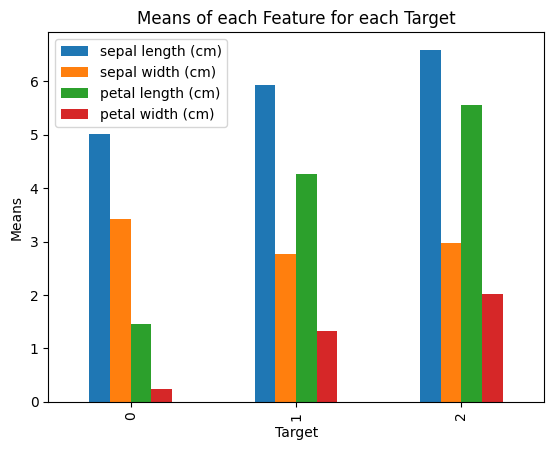

In [15]:
medians = df.groupby('target').median()
medians.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Median')
plt.title('Median of each Feature for each Target')
plt.show()

means = df.groupby('target').mean()
means.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Means')
plt.title('Means of each Feature for each Target')
plt.show()

# Clustering with Genetic Algorithm

In [4]:
X = df.drop(labels=['target'], axis=1)
y = df.loc[:,'target']

In [46]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# Initializing the population randomly
def initialize_population(num_clusters, num_individuals, data):
  population = []

  F1_lowerbound = 4.3
  F1_upperbound = 7.9

  F2_lowerbound = 2
  F2_upperbound = 4.4

  F3_lowerbound = 1
  F3_upperbound = 6.9

  F4_lowerbound = 0.1
  F4_upperbound = 2.5

  for _ in range(pop_counts):

    C1F1 = rd.randint(F1_lowerbound * 10, F1_upperbound * 10) / 10.0
    C1F2 = rd.randint(F2_lowerbound * 10, F2_upperbound * 10) / 10.0
    C1F3 = rd.randint(F3_lowerbound * 10, F3_upperbound * 10) / 10.0
    C1F4 = rd.randint(F4_lowerbound * 10, F4_upperbound * 10) / 10.0

    C2F1 = rd.randint(F1_lowerbound * 10, F1_upperbound * 10) / 10.0
    C2F2 = rd.randint(F2_lowerbound * 10, F2_upperbound * 10) / 10.0
    C2F3 = rd.randint(F3_lowerbound * 10, F3_upperbound * 10) / 10.0
    C2F4 = rd.randint(F4_lowerbound * 10, F4_upperbound * 10) / 10.0

    C3F1 = rd.randint(F1_lowerbound * 10, F1_upperbound * 10) / 10.0
    C3F2 = rd.randint(F2_lowerbound * 10, F2_upperbound * 10) / 10.0
    C3F3 = rd.randint(F3_lowerbound * 10, F3_upperbound * 10) / 10.0
    C3F4 = rd.randint(F4_lowerbound * 10, F4_upperbound * 10) / 10.0

    # list_of_cantroids = [C1F1, C1F2, C1F3, C1F4, C2F1, C2F2, C2F3, C2F4, C3F1, C3F2, C3F3, C3F4]
    centroids = np.array([[C1F1, C1F2, C1F3, C1F4], [C2F1, C2F2, C2F3, C2F4], [C3F1, C3F2, C3F3, C3F4]])
    population.append(centroids)

  return population

# Objective Function, Euclidean distance
def objective_function(population, data):
  fitness_scores = []
  for centroids in population:
    fitness = sum(np.min(pairwise_distances(data, centroids), axis=1))
    fitness_scores.append(fitness)
  return fitness_scores

# Selection
def selection(population, fitness_scores, num_parents):

  num_top_fit_parents = int(0.8 * num_parents)  # 80% of num_parents
  num_remaining_parents = num_parents - num_top_fit_parents

  sorted_indices = np.argsort(fitness_scores)
  top_fit_indices = sorted_indices[:num_top_fit_parents]

  second_half_sorted_indices = sorted_indices[len(sorted_indices)//2:]
  remaining_indices = second_half_sorted_indices[:num_remaining_parents]

  selected_population = [population[idx] for idx in top_fit_indices]
  selected_population += [population[idx] for idx in remaining_indices]

  return selected_population

# Crossover Operator
def crossover(parent1, parent2, crossover_rate):
  mask = np.random.rand(3, 4) < crossover_rate
  child1 = np.where(mask, parent1, parent2)
  child2 = np.where(mask, parent2, parent1)
  return child1, child2

# Mutation Operator
def mutation(child, mutation_rate):
  mask = np.random.rand(3, 4) < mutation_rate

  F1_lowerbound = 4.3
  F1_upperbound = 7.9
  F2_lowerbound = 2
  F2_upperbound = 4.4
  F3_lowerbound = 1
  F3_upperbound = 6.9
  F4_lowerbound = 0.1
  F4_upperbound = 2.5
  C1F1 = rd.randint(F1_lowerbound * 10, F1_upperbound * 10) / 10.0
  C1F2 = rd.randint(F2_lowerbound * 10, F2_upperbound * 10) / 10.0
  C1F3 = rd.randint(F3_lowerbound * 10, F3_upperbound * 10) / 10.0
  C1F4 = rd.randint(F4_lowerbound * 10, F4_upperbound * 10) / 10.0
  C2F1 = rd.randint(F1_lowerbound * 10, F1_upperbound * 10) / 10.0
  C2F2 = rd.randint(F2_lowerbound * 10, F2_upperbound * 10) / 10.0
  C2F3 = rd.randint(F3_lowerbound * 10, F3_upperbound * 10) / 10.0
  C2F4 = rd.randint(F4_lowerbound * 10, F4_upperbound * 10) / 10.0
  C3F1 = rd.randint(F1_lowerbound * 10, F1_upperbound * 10) / 10.0
  C3F2 = rd.randint(F2_lowerbound * 10, F2_upperbound * 10) / 10.0
  C3F3 = rd.randint(F3_lowerbound * 10, F3_upperbound * 10) / 10.0
  C3F4 = rd.randint(F4_lowerbound * 10, F4_upperbound * 10) / 10.0
  new_values = np.array([[C1F1, C1F2, C1F3, C1F4], [C2F1, C2F2, C2F3, C2F4], [C3F1, C3F2, C3F3, C3F4]])

  child_mutated = np.where(mask, new_values, child)
  return child_mutated

# Step 8: Final Solution
def clustering_ga(data, num_clusters, pop_counts, num_generations, num_parents, mutation_rate, crossover_rate):
  population = initialize_population(num_clusters, pop_counts, data)

  for generation in range(num_generations):
    fitness_scores = objective_function(population, data)
    selected_population = selection(population, fitness_scores, num_parents)

    new_population = []
    while len(new_population) < pop_counts:
      parent1, parent2 = rd.sample(selected_population, 2)
      offspring1, offspring2 = crossover(parent1, parent2, crossover_rate)
      mutated_offspring1 = mutation(offspring1, mutation_rate)
      mutated_offspring2 = mutation(offspring2, mutation_rate)
      new_population.extend([mutated_offspring1, mutated_offspring2])
    population = np.array(new_population)

  best_solution_idx = np.argmin(fitness_scores)
  best_fitness = np.min(fitness_scores)
  best_solution = population[best_solution_idx]

  return best_solution, best_fitness

# Set parameters
data = X
num_clusters = 3
pop_counts = 50
num_generations = 100
num_parents = 10
mutation_rate = 0.12
crossover_rate = 0.6

# Perform clustering using genetic algorithm
best_solution, best_fitness = clustering_ga(X, num_clusters, pop_counts, num_generations, num_parents, mutation_rate, crossover_rate)

# Assign data points to clusters using the best solution
labels, _ = pairwise_distances_argmin_min(data, best_solution)

# Print the cluster labels
print(labels)
print("Best fitness: ", best_fitness)
print("Best solution: ", best_solution)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Best fitness:  97.91122533685186
Best solution:  [[6.  2.8 4.4 1.5]
 [4.5 3.5 1.4 0.2]
 [6.7 3.1 5.6 2.2]]


In [61]:
nlabels = np.array(labels)
nnlabels = np.where(nlabels == 1, 0, np.where(nlabels == 0, 1, nlabels))
nnlabels.tolist()
nnlabels
print(len(nnlabels), len(labels))

150 150


# Analizing the Clusters

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [45]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [47]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=58b7acadf49d0a834deff69182391b601df664bae2867644d32eaf0f7f1ce857
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [62]:
import plotly.express as px
import mplcursors

centroids = best_solution

X_pca_name = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Predicted Labels': nnlabels, 'True Labels': y})
fig = px.scatter(X_pca_name, x='PCA1', y='PCA2', color='Predicted Labels', hover_data=['True Labels'])
fig.update_traces(marker=dict(size=10))
fig.show()

In [64]:
accuracy = accuracy_score(y, nnlabels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.00%


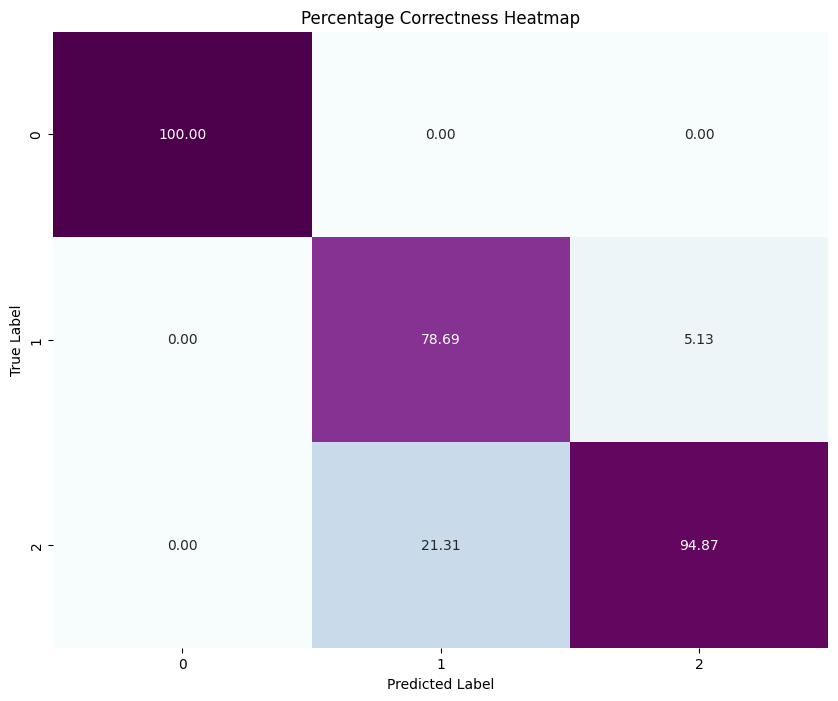

In [67]:
contingency_table = pd.crosstab(y, nnlabels, margins=True, margins_name="Total")
percentage_correctness = (contingency_table / contingency_table.loc["Total"]) * 100
plt.figure(figsize=(10, 8))
sns.heatmap(percentage_correctness.iloc[:-1, :-1], annot=True, cmap="BuPu", fmt=".2f", cbar=False)
plt.title("Correctness Percentage Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# in Comparison with K-means

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [70]:
def plot_scatter(data):
  x = [row[0] for row in data]
  y = [row[1] for row in data]

  plt.scatter(x, y)
  plt.xlabel('PCA1')
  plt.ylabel('PCA2')
  plt.title('Principal Componenets')
  plt.show()

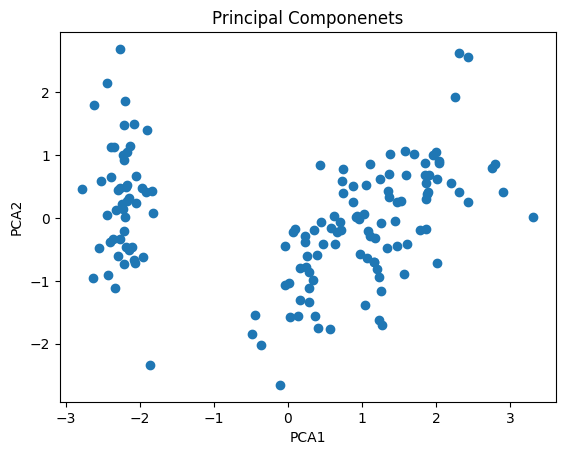

In [71]:
plot_scatter(X_pca)

In [75]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [79]:
import plotly.express as px
import mplcursors

Klabels = kmeans.labels_
nKlabels = np.array(Klabels)
nnKlabels = np.where(nKlabels == 1, 0, np.where(nKlabels == 0, 1, nKlabels))
nnKlabels.tolist()
centroids = kmeans.cluster_centers_

X_pca_name = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Predicted Labels': nnKlabels, 'True Labels': y})
fig = px.scatter(X_pca_name, x='PCA1', y='PCA2', color='Predicted Labels', hover_data=['True Labels'])
fig.update_traces(marker=dict(size=10))
fig.show()

In [81]:
accuracy = accuracy_score(y, nnKlabels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.33%


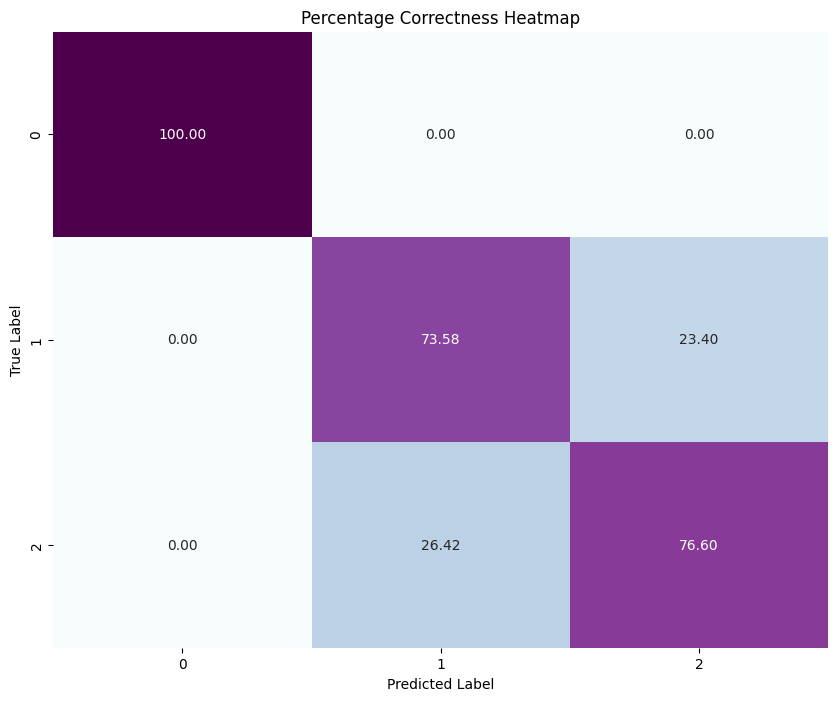

In [83]:
contingency_table = pd.crosstab(y, nnKlabels, margins=True, margins_name="Total")
percentage_correctness = (contingency_table / contingency_table.loc["Total"]) * 100
plt.figure(figsize=(10, 8))
sns.heatmap(percentage_correctness.iloc[:-1, :-1], annot=True, cmap="BuPu", fmt=".2f", cbar=False)
plt.title("Percentage Correctness Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()